In [2]:
#import package
import os,sys
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from matplotlib.cm import ScalarMappable
import seaborn as sns
import tableone
import random
import shap

from tabpfn import TabPFNRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from PyComplexHeatmap import *

from pycaret.regression import *
from pycaret.regression import RegressionExperiment

from explainerdashboard import RegressionExplainer
from explainerdashboard import ExplainerDashboard

import sklearn.model_selection as model_selection
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
#read data
dataset = pd.read_excel("data.xlsx")

dataset

In [4]:
dataset.columns

Index(['ID', 'SA_conc', 'AG_conc', 'HA_conc', 'SA(aq)_pct', 'HA(aq)_pct',
       'Mesh_number', 'PLGA-KGN', 'sEVs', 'Tendon_maturing_score', 'S-G_ratio',
       'M2/M1_ratio', 'TB_ultimate_load'],
      dtype='object')

In [6]:
columns_all=['SA_conc', 'AG_conc', 'HA_conc', 'SA(aq)_pct', 'HA(aq)_pct',
               'Mesh_number', 'PLGA-KGN', 'sEVs', 'Tendon_maturing_score', 'S-G_ratio',
               'M2/M1_ratio', 'TB_ultimate_load'
            ]

columns1 = ['SA_conc', 'AG_conc', 'HA_conc', 'SA(aq)_pct', 'HA(aq)_pct','Mesh_number', 'PLGA-KGN', 'sEVs', 'Tendon_maturing_score',]
columns2 = ['SA_conc', 'AG_conc', 'HA_conc', 'SA(aq)_pct', 'HA(aq)_pct','Mesh_number', 'PLGA-KGN', 'sEVs', 'S-G_ratio',]
columns3 = ['SA_conc', 'AG_conc', 'HA_conc', 'SA(aq)_pct', 'HA(aq)_pct','Mesh_number', 'PLGA-KGN', 'sEVs', 'M2/M1_ratio',]
columns4 = ['SA_conc', 'AG_conc', 'HA_conc', 'SA(aq)_pct', 'HA(aq)_pct','Mesh_number', 'PLGA-KGN', 'sEVs', 'TB_ultimate_load',]

# heatmap

In [20]:
%matplotlib

Using matplotlib backend: QtAgg


In [21]:
bone_Correlation = pd.DataFrame(dataset[
    columns_all])
colormap = plt.cm.viridis
# colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,12))
plt.title('Spearman Correlation of Features', y=1.05, size=15)
sns.heatmap(bone_Correlation.astype(float).corr(method='spearman').round(3)
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.yticks(rotation=360)
plt.xticks(rotation=90)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'SA_conc'),
  Text(1.5, 0, 'AG_conc'),
  Text(2.5, 0, 'HA_conc'),
  Text(3.5, 0, 'SA(aq)_pct'),
  Text(4.5, 0, 'HA(aq)_pct'),
  Text(5.5, 0, 'Mesh_number'),
  Text(6.5, 0, 'PLGA-KGN'),
  Text(7.5, 0, 'sEVs'),
  Text(8.5, 0, 'Tendon_maturing_score'),
  Text(9.5, 0, 'S-G_ratio'),
  Text(10.5, 0, 'M2/M1_ratio'),
  Text(11.5, 0, 'TB_ultimate_load')])

# 数据概况热图

In [445]:
#Put annotations on the left
plt.figure(figsize=(15, 8))

row_ha = HeatmapAnnotation(
#     label=anno_label(df_cols.Family, merge=True,rotation=45),
    SA_conc=anno_simple(dataset.SA_conc, legend=True,height=5,cmap = "Mint"),
    AG_conc=anno_simple(dataset.AG_conc,height=5,cmap = "Magenta"),
    HA_conc=anno_simple(dataset.HA_conc,height=5,cmap = "PinkYl"),
    SAaq__pct = anno_simple(dataset['SA(aq)_pct'],height=5,cmap = "Reds"),
    HAaq__pct = anno_simple(dataset['HA(aq)_pct'],height=5,cmap = "GnBu"),
    Mesh_number = anno_simple(dataset['Mesh_number'],height=5,cmap = "RdPu"),
    PLGA_KGN = anno_simple(dataset['PLGA-KGN'],height=5,cmap = "Safe"),
    sEVs = anno_simple(dataset['sEVs'],height=5,cmap = "Vivid"),
    Tendon_maturing_score = anno_simple(dataset['Tendon_maturing_score'],height=5,cmap = "Purples"),
    S_G_ratio = anno_simple(dataset['S-G_ratio'],height=5,cmap = "Blues"),
    M2_M1_ratio = anno_simple(dataset['M2/M1_ratio'],height=5,cmap = "Greens"),
    TB_ultimate_load = anno_simple(dataset['TB_ultimate_load'],height=5,cmap = "Oranges"),
    label_side='top',
    label_kws={'rotation':45,'rotation_mode':'anchor','color':'black'},
    plot=True,legend=True,plot_legend=True,legend_gap=10,legend_width = 10,
#     legend_gap=2, legend_width = 20, legend_hpad=10,
    axis=0,
    )

# plt.tight_layout()
# plt.savefig('数据概览_plot2.pdf',transparent=True)

plt.show()



# row_ha.plot_legends()
# plt.show()

Starting plotting HeatmapAnnotations


# 设置模型基础参数

In [ ]:
s1 = RegressionExperiment()
s1.setup(
#        data = dataset[features_includ],
       data = dataset[columns1],
       target = 'Tendon_maturing_score',session_id=32,
       index = False,
#        ignore_features=['ID','code'],
#        categorical_features=[ 'PLGA-KGN', 'sEVs' ],
       test_data =   dataset[columns1]  , 
       preprocess=True,
    fold=5,

       )

In [ ]:
s2 = RegressionExperiment()
s2.setup(
#        data = dataset[features_includ],
       data = dataset[columns2],
       target = 'S-G_ratio',session_id=32,
       index = False,
#        ignore_features=['ID','code'],
#        categorical_features=[ 'PLGA-KGN', 'sEVs' ],
       test_data =   dataset[columns2]  ,
       preprocess=True,
       fold=5,
)

In [ ]:
s3 = RegressionExperiment()
s3.setup(
#        data = dataset[features_includ],
       data = dataset[columns3],
       target = 'M2/M1_ratio',session_id=32,
       index = False,
#        ignore_features=['ID','code'],
#        categorical_features=[ 'PLGA-KGN', 'sEVs' ],
       test_data =   dataset[columns3]  ,
       preprocess=True,
       fold=5,
)

In [ ]:
s4 = RegressionExperiment()
s4.setup(
#        data = dataset[features_includ],
       data = dataset[columns4],
       target = 'TB_ultimate_load',session_id=32,
       index = False,
#        ignore_features=['ID','code'],
#        categorical_features=[ 'PLGA-KGN', 'sEVs' ],
       test_data =   dataset[columns4]  , 
       preprocess=True,
       fold=5,
)

## 建模

In [ ]:
best1 = s1.compare_models(sort='R2',
                      include=["tabpfn","catboost","ada","gbr","xgboost","rf",'dt','huber','br','ridge','lr','lar','en','lasso','knn'],#纳入模型
                      n_select=3,
                      cross_validation=True, 
                      )

results1 = s1.pull() 

In [ ]:
best2 = s2.compare_models(sort='R2',
                      include=["tabpfn","catboost","ada","gbr","xgboost","rf",'dt','huber','br','ridge','lr','lar','en','lasso','knn'],#纳入模型
                      n_select=3,
                      cross_validation=True, 
                      )

results1 = s2.pull() 

In [ ]:
best3 = s3.compare_models(sort='R2',
                      include=["tabpfn","catboost","ada","gbr","xgboost","rf",'dt','huber','br','ridge','lr','lar','en','lasso','knn'],#纳入模型
                      n_select=3,
                      cross_validation=True, 
                      )

results1 = s3.pull() 

In [ ]:
best4 = s4.compare_models(sort='R2',
                      include=["tabpfn","catboost","ada","gbr","xgboost","rf",'dt','huber','br','ridge','lr','lar','en','lasso','knn'],#纳入模型
                      n_select=3,
                      cross_validation=True, 
                      )

results1 = s4.pull() 

#### 设置颜色渐变

In [797]:
# 数据准备
df = results1.copy()
df['Model'][0] = 'TabPFN Regressor'
metrics = ["R2","MAE", "MSE", "RMSE",  "RMSLE", "MAPE"]

# 创建画布和子图布局
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(1, 6, width_ratios=[1, 1, 1, 1, 1, 1])

# 第一个子图（显示模型名称）
ax0 = fig.add_subplot(gs[0])
ax0.invert_yaxis()
axes = [ax0] + [fig.add_subplot(gs[i], sharey=ax0) for i in range(1, 6)]

# 统一设置颜色映射
cmap = plt.cm.Blues  # 使用蓝色渐变，可替换为 plt.cm.Reds 等

for ax, metric in zip(axes, metrics):
    # 为每个指标单独归一化数据
    values = df[metric]
    norm = plt.Normalize(vmin=values.min(), vmax=values.max())
    colors = cmap(norm(values))  # 根据值生成渐变色
    
    # 绘制条形图
    bars = ax.barh(df["Model"], values, color=colors)
#     ax.invert_yaxis()
    ax.set_title(metric, fontsize=12 if metric == "R2" else 12, pad=10, fontweight=None)
    
    # 设置x轴范围
    if metric == "R2":
        ax.set_xlim(right=1.4)
    else:
        ax.set_xlim(right=values.max() * 1.4)
    
    # 添加数值标签
    max_x = 1.4 if metric == "R2" else values.max() * 1.4
    for bar in bars:
        width = bar.get_width()
        ax.text(width + max_x*0.02,
                 bar.get_y() + bar.get_height()/2,
                 f"{width:.4f}",
                 va='center', ha='left',
                 fontsize=12,
#                  weight='bold',
                 )

# 仅第一个子图显示y轴标签
ax0.tick_params(axis='y', labelsize=9,)
for ax in axes[1:]:
    ax.tick_params(axis='y', left=False, labelleft=False)


plt.tight_layout(pad=3)
plt.subplots_adjust(wspace=0.1)
plt.suptitle("Model Performance Comparison", y=1.05, fontsize=14, fontweight=None)
plt.show()

In [798]:
#封装渐变函数
def plot_model_comparison(
    df,
    metrics=None,
    cmap=plt.cm.Blues,
    figsize=(20, 10),
    title="Model Performance Comparison",
    # 新增扩展参数
    fontsize=12,
    title_fontsize=14,
    label_fontsize=10,
    label_offset=0.02,
    r2_limit=1.4,
    scale_factor=1.4,
    bar_edgecolor='none',
    bar_alpha=1.0,
    wspace=0.1,
    show_values=True,
    value_format="{:.4f}",
    colorbar=False,
    colorbar_label="Normalized Value",
    colorbar_position=(0.92, 0.15, 0.02, 0.7),
    **title_kwargs
):
    """
    绘制单行多列模型性能对比渐变条形图（增强版）
    
    参数：
    df : DataFrame
        包含'Model'列和所有metrics指定的指标列
    metrics : list, optional
        要展示的指标列表，默认为 ["R2","MAE", "MSE", "RMSE", "RMSLE", "MAPE"]
    cmap : matplotlib colormap, optional
        颜色映射，默认为 plt.cm.Blues
    figsize : tuple, optional
        画布尺寸，默认为 (20, 10)
    title : str, optional
        图表主标题，默认为 "Model Performance Comparison"
    fontsize : int, optional
        基础字体大小（影响标题外的文字）
    title_fontsize : int, optional
        主标题字体大小
    label_fontsize : int, optional
        y轴模型名称字体大小
    label_offset : float, optional
        数值标签相对条形的水平偏移比例（基于轴范围）
    r2_limit : float, optional
        R2指标的x轴显示上限
    scale_factor : float, optional
        其他指标的x轴显示上限系数（max_value * scale_factor）
    bar_edgecolor : str, optional
        条形边缘颜色（'none'表示无边框）
    bar_alpha : float, optional
        条形透明度（0-1）
    wspace : float, optional
        子图水平间距
    show_values : bool, optional
        是否显示数值标签
    value_format : str, optional
        数值标签格式（例如 "{:.2f}" 或 "{:.4f}"）
    colorbar : bool, optional
        是否显示颜色标尺
    colorbar_label : str, optional
        颜色标尺标签文本
    colorbar_position : tuple, optional
        颜色标尺位置 (left, bottom, width, height)
    title_kwargs : dict
        传递给suptitle的额外参数（如fontweight, fontfamily等）
    """
    # 设置默认参数
    metrics = metrics or ["R2","MAE", "MSE", "RMSE", "RMSLE", "MAPE"]
    
    # 数据准备
    df = df.copy()
    df['Model'] = df['Model'].astype(str)
    df['Model'][0] = 'TabPFN Regressor'  # 特殊处理第一个模型名称
    
    # 创建画布和布局
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1, 6, width_ratios=[1, 1, 1, 1, 1, 1])
    
    # 创建子图并设置共享y轴
    ax0 = fig.add_subplot(gs[0])
    ax0.invert_yaxis()  # 反转y轴保证数据第一行在顶部
    axes = [ax0] + [fig.add_subplot(gs[i], sharey=ax0) for i in range(1, 6)]

    # 准备颜色映射
    norm_dict = {}
    for metric in metrics:
        values = df[metric]
        norm_dict[metric] = plt.Normalize(vmin=values.min(), vmax=values.max())

    # 主绘图循环
    for ax, metric in zip(axes, metrics):
        # 颜色映射
        values = df[metric]
        colors = cmap(norm_dict[metric](values))

        # 绘制条形图
        bars = ax.barh(df["Model"], values, 
                      color=colors,
                      edgecolor=bar_edgecolor,
                      alpha=bar_alpha)
        
        # 标题和坐标轴设置
        ax.set_title(metric, fontsize=fontsize, pad=10)
        if metric == "R2":
            ax.set_xlim(right=r2_limit)
        else:
            ax.set_xlim(right=values.max() * scale_factor)
        
        # 添加数值标签
        if show_values:
            max_x = r2_limit if metric == "R2" else values.max() * scale_factor
            for bar in bars:
                width = bar.get_width()
                ax.text(width + max_x*label_offset,
                        bar.get_y() + bar.get_height()/2,
                        value_format.format(width),
                        va='center', 
                        ha='left',
                        fontsize=label_fontsize)

    # y轴标签设置
    ax0.tick_params(axis='y', labelsize=label_fontsize)
    for ax in axes[1:]:
        ax.tick_params(axis='y', left=False, labelleft=False)

    # 添加颜色标尺
    if colorbar:
        cax = fig.add_axes(colorbar_position)
        sm = ScalarMappable(cmap=cmap, norm=norm_dict[metrics[0]])
        sm.set_array([])
        cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
        cbar.set_label(colorbar_label, fontsize=label_fontsize)

    # 整体布局调整
    plt.tight_layout(pad=3)
    plt.subplots_adjust(wspace=wspace)
    plt.suptitle(title, y=1.05, fontsize=title_fontsize,)
    plt.show()



In [817]:
#模型性能1
plot_model_comparison(
    results1.copy(),
    cmap=plt.cm.Purples,
    figsize=(20, 6),
    title="Model Performance Comparison",
    fontsize=12,
    label_fontsize=11,
    r2_limit=1.25,
    scale_factor=1.35,
    bar_edgecolor=None,
    bar_alpha=1,
    wspace=0.1,
    value_format="{:.4f}",
)

In [818]:
#模型性能2
plot_model_comparison(
    results2.copy(),
    cmap=plt.cm.Blues,
    figsize=(20, 6),
    title="",
    fontsize=12,
    label_fontsize=11,
    r2_limit=1.25,
    scale_factor=1.35,
    bar_edgecolor=None,
    bar_alpha=1,
    wspace=0.1,
    value_format="{:.4f}",
)

In [819]:
#模型性能3
plot_model_comparison(
    results3.copy(),
    cmap=plt.cm.Greens,
    figsize=(20, 6),
    title="",
    fontsize=12,
    label_fontsize=11,
    r2_limit=1.25,
    scale_factor=1.35,
    bar_edgecolor=None,
    bar_alpha=1,
    wspace=0.1,
    value_format="{:.4f}",
)

In [820]:
#模型性能4
plot_model_comparison(
    results4.copy(),
    cmap=plt.cm.Oranges,
    figsize=(20, 6),
    title="",
    fontsize=12,
    label_fontsize=11,
    r2_limit=1.25,
    scale_factor=1.35,
    bar_edgecolor=None,
    bar_alpha=1,
    wspace=0.1,
    value_format="{:.4f}",
)

# 预测结果

## 生成137m数据

In [ ]:
import itertools
import csv
from math import prod

# 预先生成所有参数列表
params = [
    [round(0.5 + 0.1*i, 1) for i in range(21)],  # SA_conc (21)
    [round(0.5 + 0.1*i, 1) for i in range(21)],  # AG_conc (21)
    [round(0.5 + 0.1*i, 1) for i in range(21)],  # HA_conc (21)
    list(range(10, 81, 5)),                      # SA_ratio (15)
    list(range(1, 16)),                           # HA_ratio (15)
    list(range(40, 141, 10)),                     # Mesh (11)
    [0, 1],                                       # PLGA (2)
    [0, 1, 2]                                     # sEVs (3)
]

# 计算总组合数（验证数据规模）
total = prod(len(p) for p in params)  # 21*21*21*15*15*11*2*3 = 137,525,850
print(f"总数据量：{total:,} 行")

def batch_generator(params, batch_size=10000):
    """批量生成器优化内存使用"""
    buffer = []
    for combo in itertools.product(*params):
        buffer.append(combo)
        if len(buffer) >= batch_size:
            yield buffer
            buffer = []
    if buffer:
        yield buffer

# 写入CSV文件（使用批量写入优化）
with open('optimized_combinations.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([
        'SA_conc', 'AG_conc', 'HA_conc', 
        'SA(aq)_ratio', 'HA(aq)_ratio', 
        'Mesh_number', 'PLGA-KGN', 'sEVs'
    ])
    
    batch_count = 0
    total_written = 0
    for batch in batch_generator(params, batch_size=100000):  # 调整批量大小
        writer.writerows(batch)
        total_written += len(batch)
        batch_count += 1
        
        # 每100个批次打印进度
        if batch_count % 100 == 0:
            progress = total_written / total * 100
            print(f"进度: {progress:.2f}% | 已写入 {total_written:,} 行")

print("数据集生成完成！")

## 预测

In [121]:
predictset = pd.read_csv('optimized_combinations.csv')

In [136]:
jieguo1 = best1.predict(predictset)
jieguo2 = best2.predict(predictset)
jieguo3 = best3.predict(predictset)
jieguo4 = best4.predict(predictset)

In [137]:
jieguo1 = pd.DataFrame(jieguo1, columns=['Tendon_maturing_score'])
jieguo2 = pd.DataFrame(jieguo2, columns=['S-G_ratio'])
jieguo3 = pd.DataFrame(jieguo3, columns=['M2/M1_ratio'])
jieguo4 = pd.DataFrame(jieguo4, columns=['TB_ultimate_load'])

In [139]:
jieguo_all = pd.concat([predictset,jieguo1,jieguo2,jieguo3,jieguo4],axis=1)

## 预测结果热图

In [541]:
jieguo_all_1_100 = jieguo_all.sort_values('Tendon_maturing_score',ascending=False)[0:100]
jieguo_all_2_100 = jieguo_all.sort_values('S-G_ratio',ascending=False)[0:100]
jieguo_all_3_100 = jieguo_all.sort_values('M2/M1_ratio',ascending=False)[0:100]
jieguo_all_4_100 = jieguo_all.sort_values('TB_ultimate_load',ascending=False)[0:100]
jieguo_all_3_100

,SA_conc,AG_conc,HA_conc,SA(aq)_pct,HA(aq)_pct,Mesh_number,PLGA-KGN,sEVs,Tendon_maturing_score,S-G_ratio,M2/M1_ratio,TB_ultimate_load
49972,2.0,2.3,1.6,80,7,60,1,2,26.02,79.279999,3.9640,28.719
36335,2.0,2.0,1.5,80,6,90,1,2,26.10,78.680999,3.9275,28.389
38846,2.0,2.5,1.9,75,7,50,1,2,25.57,78.282999,3.8970,28.058
17723,2.0,2.1,1.6,55,6,60,1,2,24.78,77.250999,3.8860,28.131
60249,1.9,2.3,1.6,80,7,40,1,2,24.33,78.164999,3.8815,28.050
...,...,...,...,...,...,...,...,...,...,...,...,...
21628,2.0,2.3,1.2,80,12,50,1,2,24.61,78.094999,3.7085,27.298
12097,2.0,1.9,1.9,75,4,90,1,2,25.44,77.197999,3.7080,27.346
8632,2.1,2.1,1.3,75,11,70,1,2,24.49,77.150999,3.7065,27.287
59062,1.9,2.0,1.9,50,5,50,1,2,23.71,75.724000,3.7060,27.115


In [555]:
#分类变量转文本

jieguo_all_1_100['sEVs'][jieguo_all_1_100['sEVs']==2] = 'CRV-sEVs'
jieguo_all_2_100['sEVs'][jieguo_all_2_100['sEVs']==2] = 'CRV-sEVs'
jieguo_all_3_100['sEVs'][jieguo_all_3_100['sEVs']==2] = 'CRV-sEVs'
jieguo_all_4_100['sEVs'][jieguo_all_4_100['sEVs']==2] = 'CRV-sEVs'

jieguo_all_1_100['PLGA-KGN'][jieguo_all_1_100['PLGA-KGN']==1] = 'Yes'
jieguo_all_2_100['PLGA-KGN'][jieguo_all_2_100['PLGA-KGN']==1] = 'Yes'
jieguo_all_3_100['PLGA-KGN'][jieguo_all_3_100['PLGA-KGN']==1] = 'Yes'
jieguo_all_4_100['PLGA-KGN'][jieguo_all_4_100['PLGA-KGN']==1] = 'Yes'

In [636]:
#保留两位小数
pred_fea = ['Tendon_maturing_score','S-G_ratio','M2/M1_ratio','TB_ultimate_load']
jieguo_all_1_100[pred_fea] = jieguo_all_1_100[pred_fea].round(2)
jieguo_all_2_100[pred_fea] = jieguo_all_2_100[pred_fea].round(2)
jieguo_all_3_100[pred_fea] = jieguo_all_3_100[pred_fea].round(2)
jieguo_all_4_100[pred_fea] = jieguo_all_4_100[pred_fea].round(2)

In [454]:
%matplotlib inline

In [ ]:
#画jieguo_all_1_100

plt.figure(figsize=(15, 30))

row_ha = HeatmapAnnotation(
#     label=anno_label(df_cols.Family, merge=True,rotation=45),
    SA_conc=anno_simple(jieguo_all_1_100.SA_conc, legend=True,add_text=True,text_kws=text_kws,majority=False,height=5,cmap = "Mint"),
    AG_conc=anno_simple(jieguo_all_1_100.AG_conc,height=5,add_text=True,text_kws=text_kws,majority=False,cmap = "Magenta"),
    HA_conc=anno_simple(jieguo_all_1_100.HA_conc,height=5,add_text=True,text_kws=text_kws,majority=False,cmap = "PinkYl"),
    SAaq__pct = anno_simple(jieguo_all_1_100['SA(aq)_pct'],add_text=True,text_kws=text_kws,majority=False,height=5,cmap = "Reds"),
    HAaq__pct = anno_simple(jieguo_all_1_100['HA(aq)_pct'],add_text=True,text_kws=text_kws,majority=False,height=5,cmap = "GnBu"),
    Mesh_number = anno_simple(jieguo_all_1_100['Mesh_number'],add_text=True,text_kws=text_kws,majority=False,height=5,cmap = "RdPu"),
    PLGA_KGN = anno_simple(jieguo_all_1_100['PLGA-KGN'],add_text=True,text_kws=text_kws,majority=False,height=5,cmap = "Safe"),
    sEVs = anno_simple(jieguo_all_1_100['sEVs'],add_text=True,text_kws=text_kws,majority=False,height=5,cmap = "Vivid"),
    pred_Tendon_maturing_score = anno_simple(jieguo_all_1_100['Tendon_maturing_score'],add_text=True,text_kws=text_kws,height=2,majority=False,cmap = "Purples"),
#     S_G_ratio = anno_simple(dataset['S-G_ratio'],height=5,cmap = "Blues",add_text=True,text_kws=text_kws,majority=False,),
#     M2_M1_ratio = anno_simple(dataset['M2/M1_ratio'],height=5,cmap = "Greens",add_text=True,text_kws=text_kws,majority=False,),
#     TB_ultimate_load = anno_simple(dataset['TB_ultimate_load'],height=5,cmap = "Oranges",add_text=True,text_kws=text_kws,majority=False,),
    pred_Tendon_maturing_score_bar=anno_barplot(jieguo_all_1_100['Tendon_maturing_score'],cmap = "Purples" ,legend=True),
    label_side='top',
    label_kws={'rotation':0,'rotation_mode':'anchor','color':'black',},
    plot=True,legend=True,plot_legend=True,legend_gap=10,legend_width = 10,
#     legend_gap=2, legend_width = 20, legend_hpad=10,
    axis=0,
    legend_side = 'left',
    orientation = 'right',
    
    )

# plt.tight_layout()
plt.savefig('预测结果1.pdf',transparent=True)
# plt.savefig('预测结果1.eps',transparent=True)

plt.show()

# 相关性图

In [30]:
%matplotlib inline

In [37]:
# 训练集预测结果
predict_res1 = best1.predict(dataset[features])
predict_res2 = best2.predict(dataset[features])
predict_res3 = best3.predict(dataset[features])
predict_res4 = best4.predict(dataset[features])

In [38]:
predict_res1 = pd.DataFrame(predict_res1, columns=['pred_Tendon_maturing_score'])
predict_res2 = pd.DataFrame(predict_res2, columns=['pred_S-G_ratio'])
predict_res3 = pd.DataFrame(predict_res3, columns=['pred_M2/M1_ratio'])
predict_res4 = pd.DataFrame(predict_res4, columns=['pred_TB_ultimate_load'])

In [39]:
predict_raw_all = pd.concat([dataset,predict_res1,predict_res2,predict_res3,predict_res4],axis=1)

In [41]:
r2_1 = r2_score(dataset[target1], et1.predict(dataset[features]))  # 确保x和y顺序正确
r2_2 = r2_score(dataset[target2], et2.predict(dataset[features])) 
r2_3 = r2_score(dataset[target3], et3.predict(dataset[features])) 
r2_4 = r2_score(dataset[target4], et4.predict(dataset[features])) 

In [44]:
# 生成初始有序列表
folds1 = [f"fold {i}" for i in range(1,6)]
folds2345 = [f"fold {i}" for i in range(1,6)] * 7
# 随机打乱顺序
random.seed(42) 
random.shuffle(folds2345)

folds = folds1 + folds2345

In [46]:
predict_raw_all['folds'] = folds

In [50]:
colors = ['#790f59','#373b9c','#f784b6','#39b7dd','#ccc900']

Text(0.85, 0.9, '$R^4 = 0.9336$')

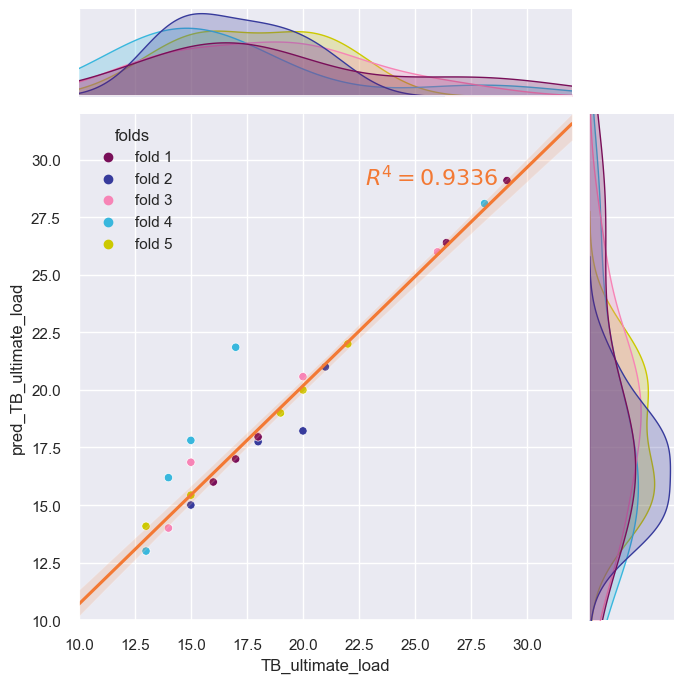

In [59]:
# Create a jointplot with kind='scatter' and hue
g = sns.jointplot(x='TB_ultimate_load', y='pred_TB_ultimate_load',
                  data=predict_raw_all, hue='folds',
                  kind='scatter', 
                  xlim=(10, 32), ylim=(10, 32),
                  palette=colors,  # Choose a palette
                  height=7)


sns.regplot(x='TB_ultimate_load', y='pred_TB_ultimate_load',
                data=predict_raw_all, scatter=False, color='#f37934',
                truncate=False, ax=g.ax_joint)


plt.text(
    x=0.85,   # 水平位置（相对坐标，1为最右侧）
    y=0.90,   # 垂直位置（相对坐标，1为最顶部）
    s=f'$R^2 = {r2_4:.4f}$',  # 显示两位小数的R²
    transform=g.ax_joint.transAxes,  # 使用相对坐标系
    ha='right',  # 水平对齐方式：右对齐
    va='top',    # 垂直对齐方式：顶部对齐
    fontsize=16, 
    color='#f37934',
)

# Shap

In [22]:
import shap
shap.initjs()

In [24]:
features = ['SA_conc', 'AG_conc', 'HA_conc', 'SA(aq)_pct', 'HA(aq)_pct','Mesh_number', 'PLGA-KGN', 'sEVs',]
target1 = ['Tendon_maturing_score']
target2 = ['S-G_ratio']
target3 = ['M2/M1_ratio']
target4 = ['TB_ultimate_load']

In [43]:
explainer = shap.Explainer(best1,dataset[features])
shap_values = explainer(dataset[features])

In [40]:
%matplotlib
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'

Using matplotlib backend: QtAgg


In [133]:
shap.summary_plot(shap_values, plot_type="bar")

In [135]:
shap.summary_plot(shap_values)

In [65]:
shap.plots.bar(shap_values)

In [91]:
shap.plots.beeswarm(shap_values , color='Purples')

In [26]:
shap_values

.values =
array([[ 3.13470454e+00,  4.01255642e-02,  4.21616052e-01,
         2.92375606e-01,  6.43089549e-02,  2.39992287e-01,
         1.54235472e+00,  1.19927197e+00],
       [-5.30433959e-01,  2.76249386e-01,  1.13522434e+00,
         3.88037464e-01,  2.84952178e-02,  1.33886597e+00,
        -4.31184031e-01,  7.29495191e-01],
       [-7.80591603e-01,  9.06333259e-02,  1.40425416e+00,
         4.99433352e-01,  2.43320845e-01,  1.52466682e-01,
         1.00820009e+00,  1.31703335e+00],
       [ 2.84257055e+00, -9.46001706e-02,  5.02870805e-01,
         3.22008289e-01, -2.66458589e-02, -1.02667127e-02,
         1.39055824e+00,  1.00825407e+00],
       [-1.06789933e+00,  2.88538174e-01,  8.44091770e-01,
         2.91138199e-01, -6.47618886e-02,  1.40033396e+00,
        -4.25041106e-01,  6.68350610e-01],
       [-7.57499478e-01, -2.85911967e-01,  8.56329713e-01,
        -2.16150102e-01, -8.17494325e-02,  1.26175042e+00,
        -5.90378677e-01,  7.48358842e-01],
       [ 8.41229246e-01,

In [27]:
#bar的值为shapvalue的平均绝对值
all_shap_values = []
for i in range(0,8):
    a = np.mean(np.abs(shap_values.values[:,i]))
    all_shap_values.append(a)
    
all_shap_values1 = pd.DataFrame(all_shap_values,columns=['values'])
all_shap_values1['features']=features

In [28]:
all_shap_values1 = all_shap_values1.sort_values('values',ascending = False)
all_shap_values1 = all_shap_values1.reset_index()


In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [32]:
all_shap_values1['values_adj'] = all_shap_values1['values']+1

In [34]:
imp_values = all_shap_values1['values_adj']

### 单个数据的图

In [405]:
shap.plots.force(shap_values[13],matplotlib=True,contribution_threshold=0.000001,link='identity')

In [406]:
shap.plots.waterfall(shap_values[13],)

In [407]:
shap.plots.force(shap_values[33],matplotlib=True,contribution_threshold=0.00001,link='identity')

In [408]:
shap.plots.waterfall(shap_values[33],)

### 所有数据的图

In [424]:
# %matplotlib inline
%matplotlib

Using matplotlib backend: QtAgg


In [435]:
sns.set(style="white")
# sns.set_style(style='ticks')#darkgrid, whitegrid, dark, white, ticks

In [436]:
shap.plots.heatmap(shap_values)

In [439]:
shap_values_old = explainer.shap_values(dataset[features])
shap.force_plot(explainer.expected_value,shap_values_old,dataset[features])